<center><span style="font-size:30px; font-weight: bold;">Nordic Compass Database</span></center>
<center><span style="font-size:24px;">Analysis of Environmental Performance and CSRD Compliance</span></center>

<center><span style="font-size:22px;"><b>Section 2:</b> Reporting | Gap analysis </span></center>

## Introduction to this section

In the previous section, I cleaned the original dataset to ensure that all companies were entered under a single name and had a consistent ticker, segment, industry and country. I then removed any duplicates, transformed any anomalous values in Boolean columns (columns that accept only 0 or 1), and set a base year of 2019. All data prior to 2019 were deleted, new columns were added, and the data frame was divided into a reporting_df and an impact_df. 

In this section, I analyse the reporting_df, which shows how well each company is meeting their environmental reporting requirements under CSRD (based on the available data we have). It is important to note that CSRD came into force in 2024, but the most recent data in the dataset is from 2022.

I first explore the dataset to see how reporting varies from one metric to the next. This might be a useful guide to help understand which services might be in demand in the near future. For example, we see that many companies do not disclose details about water discharges. This may be because they find it hard to measure, and therefore will require help to report that metric.

I use this to run a gap analysis, which shows the percentage of metrics reported...

Finally, I create a score calculator, based on the London Stock Exchange Group's methodology (LSEG, 2024), to give each company an environmental score for a given year. This score calculator is limited by the data available--the Nordic Compass dataset has around 17 relevant columns for measuring a company's environmental score, whereas LSEG used 68 metrics to constitute an environmental score. I also have a limited number of companies in some industries, so it's unreasonable to give an industry-specific score in those industries. Some industries, therefore, have been merged with others. This trade-off would not be required if the dataset was larger. My system is a simplified version, but can be useful for measuring a company's progress on environmental issues and determining companies that are performing well and not so well relative to their competitors.

To create the score calculator, I first decide what metrics are material to each industry. This is done using materiality weight, which is calculated...

```diff
- Insert here...

```

I then convert that score into an industry-specific rating and an overall rating. The industry-specific rating compares the company's performance in that year to 

```diff
- Insert here...

```

## Turing College task requirements

Congrats! You have reached the last Part of this Sprint. In this Part, you will need to use all that you learned in this and previous Sprints. As the final assignment of this Sprint, you will analyse the Coursera Course Dataset. You will have to apply all that you have learned about Data Visualization & Data Analysis to complete this task. You'll notice that in this project you have fewer explicitly stated requirements. Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration. You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.
P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future. For now just use what you have learned and try your best!

**Objectives for this Part**

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice visualizing data with Matplotlib & Seaborn or Plotly.
- Practice reading data, performing queries and filtering data using Pandas.

**Requirements**

- Download the data from [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset).
- Load the data using Pandas.
- Perform data cleaning.
- Perform exploratory data analysis.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

**Evaluation Criteria**

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Imports

In [72]:
import pandas as pd
import numpy as np
import sys
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import Dict, List, Optional
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
sys.path.append(os.path.abspath(".."))
import random

from functions import (
    test_company,
    show_missing_values,
    chart_visualisations,
    summarise_boolean_values,
    visualisations_by_year,
    map_ceo_statements,
    calculate_industry_weights,
    calculate_company_percentiles,
    calculate_raw_score,
    calculate_adjusted_score,
    assign_rating,
    cast_to_rating_category,
)

from IPython.display import display

pd.options.display.float_format = "{:,.2f}".format

In [73]:
reporting_df = pd.read_csv("../datasets/reporting_df_original.csv")

In [74]:
# reporting_df.dtypes

In [75]:
reporting_df

,company,ticker,year,revenue_MEUR,csrd_2025,csrd_2027,segment,industry,hq_country,years_esg_data,base_year,external_audit_of_ESG_report,ceo_sust_statem,environmental_policy_and_assessment,environmental_performance_targets,reduced_environmental_impact,increased_renewable_energy,disclosure_of_raw_material_use,resource_efficiency_target,disclosure_of_water_discharges,supplier_guidelines,disclosure_of_suppliers_audited,disclosure_of_supplier_evaluation_procedures,supplier_environmental_assessment,energy_consump_bool,water_withdraw_bool,ghg_emis_bool,transport_emis_bool
0,Archer Ltd.,ARCHO,2020,735.71,1,0,Mid,Energy and Utilities,Norway,1,2020,1,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0
1,AutoStore Holdings Ltd.,AUTO,2021,292.50,0,1,Large,Industrial Goods and Services,Bermuda,1,2021,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1
2,Avance Gas Holding ltd,AGAS,2019,223.59,0,1,Mid,Energy and Utilities,Norway,2,2019,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Avance Gas Holding ltd,AGAS,2020,183.68,0,0,Mid,Energy and Utilities,Norway,2,2019,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
4,Borr Drilling Ltd,BDRILL,2019,291.85,1,0,Mid,Energy and Utilities,Bermuda,4,2019,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Betsson AB,BETS,2022,777.20,1,0,Mid,Other,Sweden,4,2019,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0
1833,Karnov Group AB,KAR,2020,73.45,0,1,Mid,Consumer Goods and Services,Sweden,4,2019,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
1834,Blackstone Inc. (formerly: G4S plc),BX,2022,"8,088.58",1,0,Large,Finance,United States,1,2022,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
1835,Gaming Innovation Group Inc,GIG,2020,63.03,0,1,Mid,Technology,Malta,2,2019,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

I define the columns to be used for visualisation. Some columns, such as 'company' or 'ticker', are excluded.

In [76]:
object_columns = [
    "year",
    "segment",
    "industry",
    "hq_country",
    "years_esg_data",
    "base_year",
    "revenue_MEUR",
]

boolean_columns = [
    "csrd_2025",
    "csrd_2027",
    "external_audit_of_ESG_report",
    "ceo_sust_statem",
    "environmental_policy_and_assessment",
    "environmental_performance_targets",
    "reduced_environmental_impact",
    "increased_renewable_energy",
    "disclosure_of_raw_material_use",
    "resource_efficiency_target",
    "disclosure_of_water_discharges",
    "supplier_guidelines",
    "disclosure_of_suppliers_audited",
    "disclosure_of_supplier_evaluation_procedures",
    "supplier_environmental_assessment",
    "energy_consump_bool",
    "water_withdraw_bool",
    "ghg_emis_bool",
    "transport_emis_bool",
]


columns_for_viz = object_columns + boolean_columns

I first visualise all relevant columns to get an idea of the dataset's distribution. I then visualise by year, to see if there is any observable progress from one year to the next. Display mode can be toggled between 'count' and 'percentage'. Data from fewer companies are available in 2022 relative to other years, so percentage may be a more suitable option to compare company performance from year to year.

Noticeably, some columns seem to be missing data. 'CEO_sust_statem', for example is almost completely missing from the 2022 data, suggesting a problem with the data collection.

In [77]:
# chart_visualisations(reporting_df, columns_for_viz)

In [78]:
visualisations_by_year(reporting_df, boolean_columns, display_mode="percentage")

I group the data by industry and summarise the mean values for each year in the table below. Columns with high mean values indicate a high number of companies reporting this metric. 

In [79]:
# summarise_boolean_values(reporting_df, boolean_columns, ["year", "industry"])

To handle missing data from 2022, I extrapolate all 'CEO_sust_statem' data from 2021.

In [80]:
map_ceo_statements(reporting_df)

,company,ticker,year,revenue_MEUR,csrd_2025,csrd_2027,segment,industry,hq_country,years_esg_data,base_year,external_audit_of_ESG_report,ceo_sust_statem,environmental_policy_and_assessment,environmental_performance_targets,reduced_environmental_impact,increased_renewable_energy,disclosure_of_raw_material_use,resource_efficiency_target,disclosure_of_water_discharges,supplier_guidelines,disclosure_of_suppliers_audited,disclosure_of_supplier_evaluation_procedures,supplier_environmental_assessment,energy_consump_bool,water_withdraw_bool,ghg_emis_bool,transport_emis_bool
0,Archer Ltd.,ARCHO,2020,735.71,1,0,Mid,Energy and Utilities,Norway,1,2020,1,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0
1,AutoStore Holdings Ltd.,AUTO,2021,292.50,0,1,Large,Industrial Goods and Services,Other,1,2021,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1
2,Avance Gas Holding ltd,AGAS,2019,223.59,0,1,Mid,Energy and Utilities,Norway,2,2019,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Avance Gas Holding ltd,AGAS,2020,183.68,0,0,Mid,Energy and Utilities,Norway,2,2019,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
4,Borr Drilling Ltd,BDRILL,2019,291.85,1,0,Mid,Energy and Utilities,Other,4,2019,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Betsson AB,BETS,2022,777.20,1,0,Mid,Other,Sweden,4,2019,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0
1833,Karnov Group AB,KAR,2020,73.45,0,1,Mid,Consumer Goods and Services,Sweden,4,2019,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
1834,Blackstone Inc. (formerly: G4S plc),BX,2022,"8,088.58",1,0,Large,Finance,Other,1,2022,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
1835,Gaming Innovation Group Inc,GIG,2020,63.03,0,1,Mid,Technology,Other,2,2019,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


# Analysis of company performance

```diff
- Insert text here...
```

I first measure absolute performance by determining the number of metrics each company reports in a given year. I then compare that to the number of metrics the company reported in the previous year.

## Metrics reported

### Metrics reported by company

I first calculate the number of metrics each company has reported in a given year, and the coverage as a percentage of all metrics that could have been reported.

In [81]:
# all Boolean columns are included, except those related to CSRD--these show only whether a company must report CSRD data in 2025 or 2027
metrics = list(set(boolean_columns) - {"csrd_2025", "csrd_2027"})

metrics_reported_by_company_df = reporting_df.copy()
metrics_reported_by_company_df["metrics_reported"] = metrics_reported_by_company_df[
    metrics
].sum(axis=1)
metrics_reported_by_company_df["metric_coverage"] = metrics_reported_by_company_df[
    "metrics_reported"
] / len(metrics)

In [82]:
# metrics_reported_by_company_df.head()

To determine whether a company has improved its reporting in absolute terms since the previous year, I calculate the change in the number of metrics reported relative to the previous year.

In [83]:
# Ensure DataFrame is sorted by company and year
metrics_reported_by_company_df = metrics_reported_by_company_df.sort_values(
    by=["company", "year"]
)
metrics_reported_by_company_df["metrics_change_from_prev_year"] = (
    metrics_reported_by_company_df["metrics_reported"]
    - metrics_reported_by_company_df.groupby(["company"])["metrics_reported"].shift(1)
)

In [84]:
metrics_reported_by_company_df[
    ["company", "year", "metrics_reported", "metrics_change_from_prev_year"]
]

,company,year,metrics_reported,metrics_change_from_prev_year
104,A.P. Møller -Maersk A/S,2019,13,NaN
101,A.P. Møller -Maersk A/S,2020,14,1.00
102,A.P. Møller -Maersk A/S,2021,14,0.00
103,A.P. Møller -Maersk A/S,2022,14,0.00
1644,AAK AB,2019,12,NaN
...,...,...,...,...
611,Össur hf,2022,8,-5.00
187,Ørsted A/S,2019,12,NaN
188,Ørsted A/S,2020,15,3.00
189,Ørsted A/S,2021,15,0.00


In [85]:
# Compute industry percentile (within each year & industry)
metrics_reported_by_company_df["industry_percentile"] = (
    metrics_reported_by_company_df.groupby(["year", "industry"])[
        "metrics_reported"
    ].rank(pct=True)
)


# Compute overall percentile (within each year)
metrics_reported_by_company_df["overall_percentile"] = (
    metrics_reported_by_company_df.groupby("year")["metrics_reported"].rank(pct=True)
)

In [86]:
desired_columns = [
    "company",
    "ticker",
    "year",
    "hq_country",
    "revenue_MEUR",
    "industry",
    "metrics_reported",
    "metric_coverage",
    "industry_percentile",
    "overall_percentile",
    "metrics_change_from_prev_year",
]

remaining_columns = [
    col for col in metrics_reported_by_company_df.columns if col not in desired_columns
]

metrics_reported_by_company_df = metrics_reported_by_company_df[
    desired_columns + remaining_columns
]

In [87]:
metrics_reported_by_company_df.head()

,company,ticker,year,hq_country,revenue_MEUR,industry,metrics_reported,metric_coverage,industry_percentile,overall_percentile,metrics_change_from_prev_year,csrd_2025,csrd_2027,segment,years_esg_data,base_year,external_audit_of_ESG_report,ceo_sust_statem,environmental_policy_and_assessment,environmental_performance_targets,reduced_environmental_impact,increased_renewable_energy,disclosure_of_raw_material_use,resource_efficiency_target,disclosure_of_water_discharges,supplier_guidelines,disclosure_of_suppliers_audited,disclosure_of_supplier_evaluation_procedures,supplier_environmental_assessment,energy_consump_bool,water_withdraw_bool,ghg_emis_bool,transport_emis_bool
104,A.P. Møller -Maersk A/S,MAERSK,2019,Denmark,"34,723.21",Industrial Goods and Services,13,0.76,0.85,0.85,NaN,1,0,Large,4,2019,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0
101,A.P. Møller -Maersk A/S,MAERSK,2020,Denmark,"35,482.14",Industrial Goods and Services,14,0.82,0.88,0.89,1.00,1,0,Large,4,2019,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1
102,A.P. Møller -Maersk A/S,MAERSK,2021,Denmark,"55,166.96",Industrial Goods and Services,14,0.82,0.91,0.87,0.00,1,0,Large,4,2019,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1
103,A.P. Møller -Maersk A/S,MAERSK,2022,Denmark,"77,425.45",Industrial Goods and Services,14,0.82,0.86,0.88,0.00,1,0,Large,4,2019,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1
1644,AAK AB,AAK,2019,Sweden,"2,714.72",Consumer Goods and Services,12,0.71,0.63,0.76,NaN,1,0,Large,4,2019,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0


### Metrics reported by industry

In [88]:
metrics_reported_agg_df = metrics_reported_by_company_df.copy().drop(
    columns=["industry_percentile", "overall_percentile"]
)

In [89]:
metrics_reported_by_industry_df = metrics_reported_agg_df.groupby(
    [
        "year",
        "industry",
    ],
    as_index=True,
).agg(
    no_of_companies=("company", "count"),
    metric_coverage_mean=("metric_coverage", "mean"),
    metric_coverage_median=("metric_coverage", "median"),
)

metrics_reported_by_industry_df

no_of_companies  metric_coverage_mean  \
year industry                                                               
2019 Basic Materials                             25                  0.68   
     Consumer Goods and Services                 89                  0.58   
     Energy and Utilities                        36                  0.46   
     Finance                                    103                  0.46   
     Health Care                                 54                  0.41   
     Industrial Goods and Services              116                  0.52   
     Other                                       27                  0.48   
     Technology                                  36                  0.37   
2020 Basic Materials                             25                  0.72   
     Consumer Goods and Services                 87                  0.64   
     Energy and Utilities                        41                  0.54   
     Finance                                     98                  0.53   
     Health Care                                 55                  0.43   
     Industrial Goods and Services              117                  0.55   
     Other                                       27                  0.53   
     Technology                                  41                  0.42   
2021 Basic Materials                             18                  0.84   
     Consumer Goods and Services                 85                  0.62   
     Energy and Utilities                        29                  0.59   
     Finance                                     88                  0.55   
     Health Care                                 47                  0.45   
     Industrial Goods and Services              109                  0.58   
     Other                                       26                  0.57   
     Technology                                  37                  0.43   
2022 Basic Materials                             20                  0.78   
     Consumer Goods and Services                 68                  0.65   
     Energy and Utilities                        31                  0.50   
     Finance                                     98                  0.52   
     Health Care                                 48                  0.50   
     Industrial Goods and Services               99                  0.60   
     Other                                       22                  0.53   
     Technology                                  35                  0.50   

                                    metric_coverage_median  
year industry                                               
2019 Basic Materials                                  0.76  
     Consumer Goods and Services                      0.65  
     Energy and Utilities                             0.47  
     Finance                                          0.47  
     Health Care                                      0.41  
     Industrial Goods and Services                    0.53  
     Other                                            0.47  
     Technology                                       0.38  
2020 Basic Materials                                  0.76  
     Consumer Goods and Services                      0.65  
     Energy and Utilities                             0.59  
     Finance                                          0.53  
     Health Care                                      0.47  
     Industrial Goods and Services                    0.53  
     Other                                            0.59  
     Technology                                       0.35  
2021 Basic Materials                                  0.82  
     Consumer Goods and Services                      0.71  
     Energy and Utilities                             0.59  
     Finance                                          0.59  
     Health Care                                      0.47  
     Industria

In [90]:
metrics_reported_by_industry_df.columns

Index(['no_of_companies', 'metric_coverage_mean', 'metric_coverage_median'], dtype='object')

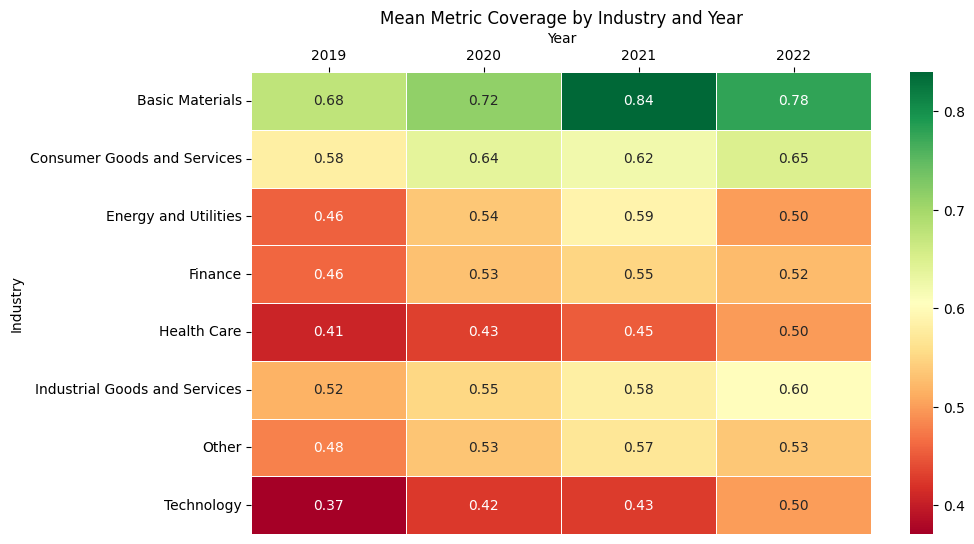

In [91]:
# Assuming you have a DataFrame named metrics_reported_by_industry_df
# If not, replace with your actual DataFrame name
df = metrics_reported_by_industry_df.copy()

# Reset index if necessary (assuming year and industry are index columns)
df = df.reset_index()

# Pivot the DataFrame to have industries as rows, years as columns, and values as metric_coverage_mean
heatmap_data = df.pivot(index="industry", columns="year", values="metric_coverage_mean")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
ax = sns.heatmap(heatmap_data, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

# Labels and title
plt.xlabel("Year")
plt.ylabel("Industry")
plt.title("Mean Metric Coverage by Industry and Year")

# Show the heatmap
plt.show()

### Metrics reported by country HQ

In [92]:
metrics_reported_by_country_df = metrics_reported_agg_df.groupby(
    ["year", "hq_country"], as_index=True
).agg(
    no_of_companies=("company", "count"),
    metric_coverage_mean=("metric_coverage", "mean"),
    metric_coverage_median=("metric_coverage", "median"),
)

metrics_reported_by_country_df = metrics_reported_by_country_df.query(
    "hq_country in ['Sweden', 'Norway', 'Denmark', 'Finland']"
)

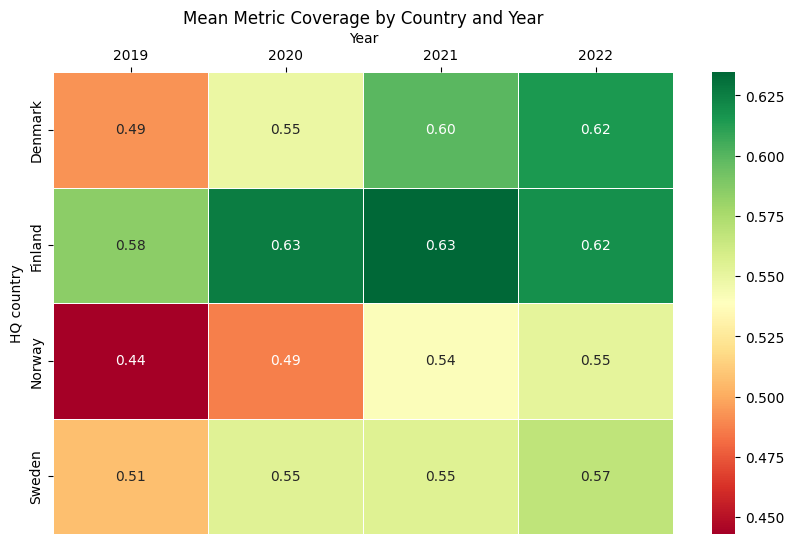

In [93]:
# Assuming you have a DataFrame named metrics_reported_by_industry_df
# If not, replace with your actual DataFrame name
df = metrics_reported_by_country_df.copy()

# Reset index if necessary (assuming year and industry are index columns)
df = df.reset_index()

# Pivot the DataFrame to have industries as rows, years as columns, and values as metric_coverage_mean
heatmap_data = df.pivot(
    index="hq_country", columns="year", values="metric_coverage_mean"
)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
ax = sns.heatmap(heatmap_data, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

# Labels and title
plt.xlabel("Year")
plt.ylabel("HQ country")
plt.title("Mean Metric Coverage by Country and Year")

# Show the heatmap
plt.show()

## Industry-specific environmental score

Metrics reported is a useful measure, but it can be misleading. Not all companies are equally affected by every metric, so each company must to determine what environmental factors are material to its operations. (Water discharges, for example, will be far more material for a mining company than for a technology company, and should be weighted accordingly.) I first calculate how material the metric is to each industry. This is done by calculating the mean value of each column. Because we are analysing Boolean columns, the higher the mean, the more companies report on this metric, and therefore the more important (material) this must be to the industry. 



The higher the mean, the higher the weight that metric is given to that industry. 

Okay, let's calculate the industry median first.

This is taken as a percentage of all industry medians to give the weight of each column to the overall score for that column.
So if the industry median for ghg_emis_bool is 0.6 for 'Energy' and 0.1 for 'Consumer Goods', then the weight for Energy is going to be 0.6/(0.6+0.1) = 90%



### Calculate industry mean

I decide which columns will be included in the environmental score.

```diff
- If external audit is 0, there should be a deduction of 10 points from the final ESG score, I think... Remove it from the scoring columns, but use it at the end.

In [94]:
scoring_cols = [
    "external_audit_of_ESG_report",  # decide whether to include this, or perhaps add it to the index
    "ceo_sust_statem",
    "environmental_policy_and_assessment",
    "environmental_performance_targets",
    "reduced_environmental_impact",
    "increased_renewable_energy",
    "disclosure_of_raw_material_use",
    "resource_efficiency_target",
    "disclosure_of_water_discharges",
    "supplier_guidelines",
    "disclosure_of_suppliers_audited",
    "disclosure_of_supplier_evaluation_procedures",
    "supplier_environmental_assessment",
    "energy_consump_bool",
    "water_withdraw_bool",
    "ghg_emis_bool",
    "transport_emis_bool",
]

I calculate the mean using values from 2019 to 2022, rather than calculating the mean for each year. The result will be used to assign materiality weights to each metric, so this method allows each metric to have the same weight from year to year, making it easier to compare companies across years. If I calculated the mean for each year, the materiality weight for each metric would vary from one year to the next, making it harder to determine whether a company has made progress from year to year.

The potential downside of the chosen method is that some metrics may become more material over time, so it may be better to calculate mean values using the most recent year as a benchmark, or the most recent n years. This is something to consider when data is added to the database in future. LSEG (2024) calculates all weights against the latest data available for all companies; this is the best method in theory, but in practice the Nordic Compass database does not have enough data for each industry to rely only on the most recent year of data to set a benchmark.


In [95]:
industry_means_all_years_df = reporting_df.groupby("industry")[scoring_cols].mean()
industry_means_all_years_df

,external_audit_of_ESG_report,ceo_sust_statem,environmental_policy_and_assessment,environmental_performance_targets,reduced_environmental_impact,increased_renewable_energy,disclosure_of_raw_material_use,resource_efficiency_target,disclosure_of_water_discharges,supplier_guidelines,disclosure_of_suppliers_audited,disclosure_of_supplier_evaluation_procedures,supplier_environmental_assessment,energy_consump_bool,water_withdraw_bool,ghg_emis_bool,transport_emis_bool
industry,,,,,,,,,,,,,,,,,
Basic Materials,0.65,0.85,0.99,0.93,0.91,0.35,0.73,0.69,0.53,0.88,0.60,0.58,0.81,0.90,0.85,0.88,0.52
Consumer Goods and Services,0.42,0.80,0.96,0.88,0.94,0.45,0.31,0.68,0.15,0.89,0.38,0.47,0.77,0.68,0.46,0.76,0.57
Energy and Utilities,0.26,0.74,0.91,0.82,0.85,0.19,0.05,0.54,0.25,0.71,0.38,0.38,0.59,0.66,0.31,0.66,0.49
Finance,0.42,0.75,0.90,0.78,0.87,0.35,0.09,0.46,0.01,0.77,0.20,0.30,0.63,0.59,0.30,0.68,0.63
Health Care,0.34,0.60,0.82,0.57,0.78,0.27,0.07,0.32,0.03,0.83,0.40,0.29,0.62,0.40,0.33,0.52,0.35
Industrial Goods and Services,0.40,0.81,0.94,0.84,0.94,0.38,0.12,0.59,0.06,0.85,0.41,0.44,0.69,0.60,0.32,0.66,0.47
Other,0.49,0.75,0.94,0.82,0.94,0.25,0.09,0.43,0.01,0.76,0.25,0.39,0.69,0.68,0.20,0.73,0.58
Technology,0.32,0.61,0.78,0.64,0.78,0.26,0.05,0.43,0.01,0.69,0.30,0.28,0.57,0.47,0.20,0.52,0.42


### Calculate materiality

Once I have calculated the mean of each column for every industry, I am able to calculate the weight that should be given to that column. This is done by adding the mean of every column for a given industry, which gives me the 'industry_materiality_score'. I then divide the mean value for each column by the industry materiality score to calculate the materiality weight for each column.

Industries with the highest 'industry_materiality_score' are assumed to be the industries with the most reporting requirements--more metrics are material for this industry than any other industry.

This method differs slightly from the LSEG (2024) method: I incorporate data from all companies when calculating mean values, whereas LSEG considers only large- and mid-cap companies. I have only 10 rows of the data from small-cap companies, so the impact on the mean is minimal. (I could delete those 10 rows, but I would rather not, and it seems unnecessary to make my scoring functions more complicated to avoid using those 10 rows in the calculation.)

```diff
- This is a flawed approach, because materiality is decided by CSRD regulations rather than by the number of companies in the industry that have reported on a metric, but this approach is still useful given the data available, and is based on the method used by LSEG (2024). 



In [96]:
reporting_df.groupby("segment")["company"].count()

segment
Large    1028
Mid       799
Small      10
Name: company, dtype: int64

In [97]:
industry_weights_df = calculate_industry_weights(reporting_df, scoring_cols)

In [98]:
# industry_weights_df

In [99]:
# Show only materiality weight columns and the materiality score
industry_weights_df[
    ["industry_materiality_score"]
    + [f"{col}_materiality_weight" for col in scoring_cols]
]

,industry_materiality_score,external_audit_of_ESG_report_materiality_weight,ceo_sust_statem_materiality_weight,environmental_policy_and_assessment_materiality_weight,environmental_performance_targets_materiality_weight,reduced_environmental_impact_materiality_weight,increased_renewable_energy_materiality_weight,disclosure_of_raw_material_use_materiality_weight,resource_efficiency_target_materiality_weight,disclosure_of_water_discharges_materiality_weight,supplier_guidelines_materiality_weight,disclosure_of_suppliers_audited_materiality_weight,disclosure_of_supplier_evaluation_procedures_materiality_weight,supplier_environmental_assessment_materiality_weight,energy_consump_bool_materiality_weight,water_withdraw_bool_materiality_weight,ghg_emis_bool_materiality_weight,transport_emis_bool_materiality_weight
industry,,,,,,,,,,,,,,,,,,
Basic Materials,12.65,0.05,0.07,0.08,0.07,0.07,0.03,0.06,0.05,0.04,0.07,0.05,0.05,0.06,0.07,0.07,0.07,0.04
Consumer Goods and Services,10.55,0.04,0.08,0.09,0.08,0.09,0.04,0.03,0.06,0.01,0.08,0.04,0.04,0.07,0.06,0.04,0.07,0.05
Energy and Utilities,8.80,0.03,0.08,0.10,0.09,0.10,0.02,0.01,0.06,0.03,0.08,0.04,0.04,0.07,0.08,0.03,0.08,0.06
Finance,8.74,0.05,0.09,0.10,0.09,0.10,0.04,0.01,0.05,0.00,0.09,0.02,0.03,0.07,0.07,0.03,0.08,0.07
Health Care,7.57,0.05,0.08,0.11,0.08,0.10,0.04,0.01,0.04,0.00,0.11,0.05,0.04,0.08,0.05,0.04,0.07,0.05
Industrial Goods and Services,9.53,0.04,0.09,0.10,0.09,0.10,0.04,0.01,0.06,0.01,0.09,0.04,0.05,0.07,0.06,0.03,0.07,0.05
Other,8.99,0.05,0.08,0.10,0.09,0.10,0.03,0.01,0.05,0.00,0.09,0.03,0.04,0.08,0.08,0.02,0.08,0.06
Technology,7.32,0.04,0.08,0.11,0.09,0.11,0.03,0.01,0.06,0.00,0.09,0.04,0.04,0.08,0.06,0.03,0.07,0.06


### Calculate company percentiles

Company percentiles are calculated by comparing the value of each metric to other companies in the industry. Given that each metric is Boolean (either 1 or 0), only those values of 1 will be calculated as a relative percentile rank--a company with a value of 0 for a given metric will receive a percentile rank of 0 for that metric.

For companies with a value of 1 for a given metric, the percentile rank is calculated as follows: 

$$

\text{score} = \frac{\text{no. of companies with a worse value} + \frac{\text{no. of companies with the same value, inc. current company}}{2}}{\text{total no. of companies}}

$$


In [100]:
company_percentiles_by_industry_df = calculate_company_percentiles(
    reporting_df, scoring_cols, by_industry=True
)

In [101]:
company_percentiles_by_industry_df[
    company_percentiles_by_industry_df["company"] == "Archer Ltd."
]

,company,ticker,year,hq_country,revenue_MEUR,industry,external_audit_of_ESG_report_percentile,ceo_sust_statem_percentile,environmental_policy_and_assessment_percentile,environmental_performance_targets_percentile,reduced_environmental_impact_percentile,increased_renewable_energy_percentile,disclosure_of_raw_material_use_percentile,resource_efficiency_target_percentile,disclosure_of_water_discharges_percentile,supplier_guidelines_percentile,disclosure_of_suppliers_audited_percentile,disclosure_of_supplier_evaluation_procedures_percentile,supplier_environmental_assessment_percentile,energy_consump_bool_percentile,water_withdraw_bool_percentile,ghg_emis_bool_percentile,transport_emis_bool_percentile
453,Archer Ltd.,ARCHO,2020,Norway,735.71,Energy and Utilities,0.87,0.60,0.54,0.55,0.56,0.00,0.00,0.60,0.00,0.66,0.79,0.00,0.00,0.63,0.00,0.00,0.00


### Calculate score

The environmental score for each company is calculated by multiplying the percentile for each metric with that metric's relative weight. These values are then added to give a raw score. To calculate the adjusted score, these raw scores are then converted to percentiles, giving each company a score that reflects their ranking relative to others in the same industry. This is then converted to a rating, from A+ to D-.

I first calculate the raw score.

In [102]:
sector_specific_scoring_df = calculate_raw_score(
    company_percentiles_by_industry_df, industry_weights_df, scoring_cols
)

In [103]:
sector_specific_scoring_df[
    (sector_specific_scoring_df["industry"] == "Energy and Utilities")
    & (sector_specific_scoring_df["year"] == 2020)
].head()

,company,ticker,year,hq_country,revenue_MEUR,industry,industry_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score
453,Archer Ltd.,ARCHO,2020,Norway,735.71,Energy and Utilities,0.41,0.03,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.00,0.00,0.05,0.00,0.00,0.00
454,Avance Gas Holding ltd,AGAS,2020,Norway,183.68,Energy and Utilities,0.37,0.03,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00
455,Borr Drilling Ltd,BDRILL,2020,Other,274.55,Energy and Utilities,0.52,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.04,0.05,0.05,0.00,0.05,0.00
456,BW LPG,BWLPG,2020,Other,555.01,Energy and Utilities,0.47,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.04,0.05,0.05,0.00,0.00,0.00
457,BW Offshore Limited,BWO,2020,Other,720.65,Energy and Utilities,0.42,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.02,0.05,0.00,0.00,0.05,0.05,0.00,0.00,0.00


I then calculate an adjusted score by converting the raw score into a percentile relative to other companies in the same industry and the same year. I created an option in the function to group by_industry or to compare against all companies, regardless of industry. To calculate the sector-specific score, I group by industry. Later, when calculating the cross-sector score, I will compare to all other companies.

In [104]:
sector_specific_scoring_df = calculate_adjusted_score(
    sector_specific_scoring_df, raw_column="industry_score_raw", by_industry=True
)

In [105]:
sector_specific_scoring_df

,company,ticker,year,hq_country,revenue_MEUR,industry,industry_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score,industry_score_adjusted
0,Josemaria Resources Inc.,JOSE,2019,Other,NaN,Basic Materials,0.08,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06
1,Lucara Diamond Corp.,LUC,2019,Other,171.92,Basic Materials,0.31,0.03,0.04,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.04,0.03,0.18
2,Lundin Gold Inc.,LUG,2019,Other,NaN,Basic Materials,0.19,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.03,0.10
3,Lundin Mining Corporation,LUMI,2019,Other,"1,689.92",Basic Materials,0.46,0.03,0.04,0.04,0.04,0.04,0.02,0.00,0.04,0.03,0.05,0.00,0.00,0.00,0.04,0.04,0.04,0.00,0.42
4,H+H International A/S,HH,2019,Denmark,380.19,Basic Materials,0.27,0.00,0.00,0.04,0.04,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.04,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Cint Group AB,CINT,2022,Sweden,295.19,Technology,0.38,0.04,0.05,0.07,0.05,0.06,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.33
1833,Garo AB,GARO,2022,Sweden,130.81,Technology,0.60,0.04,0.05,0.07,0.05,0.06,0.03,0.00,0.05,0.00,0.06,0.00,0.03,0.05,0.04,0.02,0.04,0.00,0.87
1834,Proact IT Group AB,PACT,2022,Sweden,447.51,Technology,0.49,0.04,0.05,0.07,0.05,0.06,0.00,0.00,0.05,0.00,0.06,0.03,0.03,0.05,0.00,0.00,0.00,0.00,0.56
1835,Hexagon AB,HEXA,2022,Sweden,"5,160.00",Technology,0.51,0.00,0.05,0.07,0.00,0.06,0.03,0.00,0.00,0.00,0.06,0.03,0.00,0.05,0.04,0.02,0.04,0.04,0.59


I then give each company an industry rating based on its adjusted score. This rating system is based on LSEG (2024):

| Percentile Range  | Rating |
|-------------------|--------|
| 0.92 < p ≤ 1     | A+     |
| 0.83 < p ≤ 0.92  | A      |
| 0.75 < p ≤ 0.83  | A-     |
| 0.67 < p ≤ 0.75  | B+     |
| 0.58 < p ≤ 0.66  | B      |
| 0.50 < p ≤ 0.58  | B-     |
| 0.42 < p ≤ 0.50  | C+     |
| 0.33 < p ≤ 0.42  | C      |
| 0.25 < p ≤ 0.33  | C-     |
| 0.17 < p ≤ 0.25  | D+     |
| 0.08 < p ≤ 0.17  | D      |
| 0.00 ≤ p ≤ 0.08  | D-     |


In [106]:
sector_specific_scoring_df["industry_rating"] = sector_specific_scoring_df[
    "industry_score_adjusted"
].apply(assign_rating)

sector_specific_scoring_df["industry_rating"] = cast_to_rating_category(
    sector_specific_scoring_df["industry_rating"]
)

In [107]:
# re-order columns
first_cols = [
    "company",
    "ticker",
    "year",
    "industry",
    "hq_country",
    "revenue_MEUR",
    "industry_rating",
    "industry_score_adjusted",
]

remaining_cols = [
    col for col in sector_specific_scoring_df.columns if col not in first_cols
]
sector_specific_scoring_df = sector_specific_scoring_df[first_cols + remaining_cols]

Finally, I calculate the previous year's rating for each company to be used as a comparison.

In [108]:
sector_specific_scoring_df = sector_specific_scoring_df.sort_values(
    ["company", "year"]
).assign(
    industry_rating_previous_year=lambda df: df.groupby("company")[
        "industry_rating"
    ].shift(1)
)

In [109]:
sector_specific_scoring_df.head()

,company,ticker,year,industry,hq_country,revenue_MEUR,industry_rating,industry_score_adjusted,industry_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score,industry_rating_previous_year
1152,A.P. Møller -Maersk A/S,MAERSK,2019,Industrial Goods and Services,Denmark,"34,723.21",A,0.87,0.59,0.03,0.05,0.05,0.05,0.05,0.00,0.00,0.05,0.00,0.05,0.03,0.04,0.05,0.05,0.03,0.05,0.00,NaN
1268,A.P. Møller -Maersk A/S,MAERSK,2020,Industrial Goods and Services,Denmark,"35,482.14",A,0.88,0.61,0.03,0.05,0.05,0.05,0.05,0.03,0.00,0.04,0.00,0.05,0.04,0.00,0.05,0.04,0.03,0.05,0.04,A
1388,A.P. Møller -Maersk A/S,MAERSK,2021,Industrial Goods and Services,Denmark,"55,166.96",A,0.90,0.59,0.03,0.05,0.05,0.05,0.05,0.03,0.00,0.00,0.00,0.05,0.03,0.04,0.05,0.04,0.03,0.04,0.04,A
1494,A.P. Møller -Maersk A/S,MAERSK,2022,Industrial Goods and Services,Denmark,"77,425.45",A,0.86,0.59,0.00,0.05,0.06,0.05,0.05,0.03,0.00,0.04,0.00,0.05,0.03,0.04,0.04,0.04,0.03,0.04,0.03,A
173,AAK AB,AAK,2019,Consumer Goods and Services,Sweden,"2,714.72",B,0.59,0.50,0.03,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.05,0.04,0.00,0.00,NaN


In [110]:
# sector_specific_scoring_df[
#     (sector_specific_scoring_df["industry"] == "Energy and Utilities")
#     & (sector_specific_scoring_df["year"] == 2020)
# ]

## Cross-industry environmental score

```diff
- Add notes in this section

I then compare the industry-specific score with a cross-industry score, comparing all companies, regardless of industry.

```diff
- For each company, sum all scores (percentile rank for each column). Add all scores for every company, and give each company a percentile rank based on the score equation above.

```diff
- First, calculate the materiality weight for each column, regardless of industry.
- Then, calculate company percentiles for each column.
- Sum percentiles.
- Then take the percentiles for that sum.`

### Calculate overall mean and materiality

In [111]:
metric_materiality_all_years_df = reporting_df[scoring_cols].mean().reset_index()
metric_materiality_all_years_df.columns = ["", "mean_score"]

In [112]:
metric_materiality_all_years_df["overall_materiality_score"] = (
    metric_materiality_all_years_df["mean_score"].sum()
)

metric_materiality_all_years_df["metric_materiality"] = (
    metric_materiality_all_years_df["mean_score"]
    / metric_materiality_all_years_df["overall_materiality_score"]
)

metric_materiality_all_years_df = metric_materiality_all_years_df.set_index("").T

In [113]:
metric_materiality_all_years_df

,external_audit_of_ESG_report,ceo_sust_statem,environmental_policy_and_assessment,environmental_performance_targets,reduced_environmental_impact,increased_renewable_energy,disclosure_of_raw_material_use,resource_efficiency_target,disclosure_of_water_discharges,supplier_guidelines,disclosure_of_suppliers_audited,disclosure_of_supplier_evaluation_procedures,supplier_environmental_assessment,energy_consump_bool,water_withdraw_bool,ghg_emis_bool,transport_emis_bool
mean_score,0.40,0.75,0.91,0.79,0.89,0.34,0.16,0.53,0.09,0.81,0.35,0.39,0.67,0.60,0.35,0.67,0.51
overall_materiality_score,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22
metric_materiality,0.04,0.08,0.10,0.09,0.10,0.04,0.02,0.06,0.01,0.09,0.04,0.04,0.07,0.07,0.04,0.07,0.06


### Calculate company percentiles

In [114]:
company_percentiles_overall_df = calculate_company_percentiles(
    reporting_df, scoring_cols, by_industry=False
)

In [115]:
company_percentiles_overall_df[
    company_percentiles_overall_df["company"] == "Archer Ltd."
]

,company,ticker,year,hq_country,revenue_MEUR,industry,external_audit_of_ESG_report_percentile,ceo_sust_statem_percentile,environmental_policy_and_assessment_percentile,environmental_performance_targets_percentile,reduced_environmental_impact_percentile,increased_renewable_energy_percentile,disclosure_of_raw_material_use_percentile,resource_efficiency_target_percentile,disclosure_of_water_discharges_percentile,supplier_guidelines_percentile,disclosure_of_suppliers_audited_percentile,disclosure_of_supplier_evaluation_procedures_percentile,supplier_environmental_assessment_percentile,energy_consump_bool_percentile,water_withdraw_bool_percentile,ghg_emis_bool_percentile,transport_emis_bool_percentile
486,Archer Ltd.,ARCHO,2020,Norway,735.71,Energy and Utilities,0.80,0.62,0.53,0.59,0.55,0.00,0.00,0.69,0.00,0.59,0.83,0.00,0.00,0.69,0.00,0.00,0.00


### Calculate score

In [116]:
cross_sector_scoring_df = calculate_raw_score(
    company_percentiles_overall_df,
    metric_materiality_all_years_df,
    scoring_cols,
    by_industry=False,
)

In [117]:
cross_sector_scoring_df[
    (cross_sector_scoring_df["industry"] == "Energy and Utilities")
    & (cross_sector_scoring_df["year"] == 2020)
].head()

,company,ticker,year,hq_country,revenue_MEUR,industry,overall_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score
486,Archer Ltd.,ARCHO,2020,Norway,735.71,Energy and Utilities,0.41,0.03,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.00,0.00,0.05,0.00,0.00,0.00
487,Avance Gas Holding ltd,AGAS,2020,Norway,183.68,Energy and Utilities,0.38,0.03,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00
488,Borr Drilling Ltd,BDRILL,2020,Other,274.55,Energy and Utilities,0.51,0.00,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.05,0.00,0.05,0.00
489,BW LPG,BWLPG,2020,Other,555.01,Energy and Utilities,0.46,0.00,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.05,0.00,0.00,0.00
490,BW Offshore Limited,BWO,2020,Other,720.65,Energy and Utilities,0.40,0.00,0.05,0.05,0.05,0.05,0.00,0.00,0.04,0.01,0.05,0.00,0.00,0.05,0.05,0.00,0.00,0.00


The overall adjusted score is calculated by converting the overall raw score into a percentile, relative to other company scores for a given year. I decided this was more suitable as a relative measure, rather than comparing to other company scores across all years. However, one potential downside is that some companies have a higher overall_raw_score but lower overall_adjusted_score than others. This is because the performance of other companies in that year will have been higher, dragging down the company's percentile score.

In [118]:
cross_sector_scoring_df = calculate_adjusted_score(
    cross_sector_scoring_df, raw_column="overall_score_raw", by_industry=False
)

In [119]:
cross_sector_scoring_df

,company,ticker,year,hq_country,revenue_MEUR,industry,overall_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score,overall_score_adjusted
0,Avance Gas Holding ltd,AGAS,2019,Norway,223.59,Energy and Utilities,0.22,0.00,0.06,0.05,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19
1,Borr Drilling Ltd,BDRILL,2019,Other,291.85,Energy and Utilities,0.35,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.05,0.05,0.39
2,BW LPG,BWLPG,2019,Other,728.22,Energy and Utilities,0.16,0.00,0.06,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13
3,BW Offshore Limited,BWO,2019,Other,844.03,Energy and Utilities,0.27,0.00,0.06,0.05,0.00,0.05,0.00,0.00,0.00,0.01,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.27
4,FLEX LNG Ltd,FLNG,2019,Other,107.11,Energy and Utilities,0.36,0.00,0.06,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Collector Bank AB (formerly: Collector AB),COLL,2022,Sweden,302.18,Finance,0.33,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.22
1833,Modern Times Group MTG AB,MTG,2022,Sweden,520.91,Other,0.43,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.04,0.04,0.40
1834,SECTRA AB,SECT,2022,Sweden,183.37,Health Care,0.25,0.00,0.05,0.06,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.16
1835,Betsson AB,BETS,2022,Sweden,777.20,Other,0.35,0.00,0.05,0.06,0.05,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.05,0.04,0.00,0.00,0.00,0.25


In [120]:
cross_sector_scoring_df["overall_rating"] = cross_sector_scoring_df[
    "overall_score_adjusted"
].apply(assign_rating)

cross_sector_scoring_df["overall_rating"] = cast_to_rating_category(
    cross_sector_scoring_df["overall_rating"]
)

In [121]:
# re-order columns
first_cols = [
    "company",
    "ticker",
    "year",
    "industry",
    "overall_rating",
    "overall_score_adjusted",
]

remaining_cols = [
    col for col in cross_sector_scoring_df.columns if col not in first_cols
]
cross_sector_scoring_df = cross_sector_scoring_df[first_cols + remaining_cols]

In [122]:
cross_sector_scoring_df = cross_sector_scoring_df.sort_values(
    ["company", "year"]
).assign(
    overall_rating_previous_year=lambda df: df.groupby("company")[
        "overall_rating"
    ].shift(1)
)

In [123]:
# cross_sector_scoring_df[
#     (cross_sector_scoring_df["industry"] == "Energy and Utilities")
#     & (cross_sector_scoring_df["year"] == 2020)
# ]

In [124]:
cross_sector_scoring_df

,company,ticker,year,industry,overall_rating,overall_score_adjusted,hq_country,revenue_MEUR,overall_score_raw,external_audit_of_ESG_report_score,ceo_sust_statem_score,environmental_policy_and_assessment_score,environmental_performance_targets_score,reduced_environmental_impact_score,increased_renewable_energy_score,disclosure_of_raw_material_use_score,resource_efficiency_target_score,disclosure_of_water_discharges_score,supplier_guidelines_score,disclosure_of_suppliers_audited_score,disclosure_of_supplier_evaluation_procedures_score,supplier_environmental_assessment_score,energy_consump_bool_score,water_withdraw_bool_score,ghg_emis_bool_score,transport_emis_bool_score,overall_rating_previous_year
28,A.P. Møller -Maersk A/S,MAERSK,2019,Industrial Goods and Services,A,0.87,Denmark,"34,723.21",0.60,0.03,0.06,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.05,0.03,0.05,0.00,NaN
517,A.P. Møller -Maersk A/S,MAERSK,2020,Industrial Goods and Services,A,0.91,Denmark,"35,482.14",0.61,0.03,0.05,0.05,0.05,0.05,0.03,0.00,0.04,0.00,0.05,0.03,0.00,0.05,0.05,0.03,0.05,0.04,A
998,A.P. Møller -Maersk A/S,MAERSK,2021,Industrial Goods and Services,A,0.87,Denmark,"55,166.96",0.59,0.03,0.05,0.05,0.05,0.05,0.03,0.00,0.00,0.00,0.05,0.03,0.03,0.05,0.05,0.03,0.05,0.04,A
1437,A.P. Møller -Maersk A/S,MAERSK,2022,Industrial Goods and Services,A,0.89,Denmark,"77,425.45",0.60,0.00,0.05,0.06,0.05,0.05,0.03,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.04,0.03,0.04,0.04,A
462,AAK AB,AAK,2019,Consumer Goods and Services,B+,0.74,Sweden,"2,714.72",0.55,0.03,0.06,0.05,0.05,0.05,0.00,0.00,0.04,0.00,0.05,0.03,0.03,0.05,0.05,0.03,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,Össur hf,OSSR,2022,Health Care,C-,0.26,Other,682.78,0.36,0.00,0.05,0.06,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.04,0.03,0.04,0.04,B+
51,Ørsted A/S,ORSTED,2019,Energy and Utilities,B+,0.70,Denmark,"9,081.93",0.53,0.03,0.06,0.05,0.05,0.05,0.03,0.00,0.00,0.01,0.05,0.00,0.00,0.00,0.05,0.03,0.05,0.05,NaN
540,Ørsted A/S,ORSTED,2020,Energy and Utilities,A+,0.94,Denmark,"7,041.63",0.63,0.03,0.05,0.05,0.05,0.05,0.03,0.02,0.04,0.00,0.05,0.03,0.00,0.05,0.05,0.03,0.05,0.04,B+
1017,Ørsted A/S,ORSTED,2021,Energy and Utilities,A+,0.93,Denmark,"6,799.33",0.62,0.03,0.05,0.05,0.05,0.05,0.03,0.00,0.04,0.01,0.05,0.03,0.00,0.05,0.05,0.03,0.05,0.04,A+


## Summary of results

```diff
- Create a migration matrix to see how many change from year to year
- Consider what to do with unaudited companies

In [125]:
reporting_summary_df = sector_specific_scoring_df.merge(
    cross_sector_scoring_df, on=["company", "year"], how="left", suffixes=("", "_drop")
).merge(
    metrics_reported_by_company_df,
    on=["company", "year"],
    how="left",
    suffixes=("", "_drop2"),
)

reporting_summary_df = reporting_summary_df.loc[
    :, ~reporting_summary_df.columns.str.endswith(("_drop", "_drop2"))
]

columns_to_keep = [
    "company",
    "ticker",
    "year",
    "industry",
    "hq_country",
    "revenue_MEUR",
    "segment",
    "industry_rating",
    "overall_rating",
    "metrics_reported",
    "metric_coverage",
    "industry_score_adjusted",
    "industry_score_raw",
    "overall_score_adjusted",
    "overall_score_raw",
    "external_audit_of_ESG_report",
    "csrd_2025",
    "csrd_2027",
    "industry_rating_previous_year",
    "overall_rating_previous_year",
]

reporting_summary_df = reporting_summary_df[columns_to_keep]

In [126]:
reporting_summary_df.columns

Index(['company', 'ticker', 'year', 'industry', 'hq_country', 'revenue_MEUR',
       'segment', 'industry_rating', 'overall_rating', 'metrics_reported',
       'metric_coverage', 'industry_score_adjusted', 'industry_score_raw',
       'overall_score_adjusted', 'overall_score_raw',
       'external_audit_of_ESG_report', 'csrd_2025', 'csrd_2027',
       'industry_rating_previous_year', 'overall_rating_previous_year'],
      dtype='object')

In [127]:
reporting_summary_df.head()

,company,ticker,year,industry,hq_country,revenue_MEUR,segment,industry_rating,overall_rating,metrics_reported,metric_coverage,industry_score_adjusted,industry_score_raw,overall_score_adjusted,overall_score_raw,external_audit_of_ESG_report,csrd_2025,csrd_2027,industry_rating_previous_year,overall_rating_previous_year
0,A.P. Møller -Maersk A/S,MAERSK,2019,Industrial Goods and Services,Denmark,"34,723.21",Large,A,A,13,0.76,0.87,0.59,0.87,0.60,1,1,0,NaN,NaN
1,A.P. Møller -Maersk A/S,MAERSK,2020,Industrial Goods and Services,Denmark,"35,482.14",Large,A,A,14,0.82,0.88,0.61,0.91,0.61,1,1,0,A,A
2,A.P. Møller -Maersk A/S,MAERSK,2021,Industrial Goods and Services,Denmark,"55,166.96",Large,A,A,14,0.82,0.90,0.59,0.87,0.59,1,1,0,A,A
3,A.P. Møller -Maersk A/S,MAERSK,2022,Industrial Goods and Services,Denmark,"77,425.45",Large,A,A,14,0.82,0.86,0.59,0.89,0.60,0,1,0,A,A
4,AAK AB,AAK,2019,Consumer Goods and Services,Sweden,"2,714.72",Large,B,B+,12,0.71,0.59,0.50,0.74,0.55,1,1,0,NaN,NaN


## Visualisations

```diff
- Migration matrix

- Show overall ratings by industry for a given year. Which industries have the highest number of A+ ratings?



- Main visualisations can come in the emissions section:
-- Box plots
- Average metrics reported by CSRD 2025, CSRD 2027 (this can be better represented on a dashboard)



### Migration matrix

In [128]:
def build_migration_matrix(
    df: pd.DataFrame,
    year="all",
    industry_rating: bool = True,
    entity_col: str = "company",
    segment="all",
    industry="all",
    hq_country="all",
    external_audit_of_esg_report="all",
    csrd_2025="all",
    csrd_2027="all",
) -> pd.DataFrame:
    """
    Build a migration matrix (crosstab) comparing previous-year ratings vs. current-year ratings.

    This function assumes that if the previous-year rating column is missing,
    it should be computed by grouping by the entity_col (default 'company') and sorting by 'year'.

    Parameters
    ----------
    df : pd.DataFrame
        Your dataset.
    year : int, list, or 'all' (default 'all')
        Filter by year(s); use 'all' to include all years.
    industry_rating : bool, default True
        If True, use 'industry_rating' and compute (or use) 'industry_rating_previous_year';
        if False, use 'overall_rating' and 'overall_rating_previous_year'.
    entity_col : str, default 'company'
        The column name used to identify each entity when computing previous ratings.
    segment, industry, hq_country, external_audit_of_esg_report, csrd_2025, csrd_2027 :
        Filtering parameters. Use a single value, a list of values, or 'all' (default 'all') to apply no filtering.

    Returns
    -------
    pd.DataFrame
        A migration matrix (crosstab) from previous rating to current rating with company counts and styled formatting.
    """

    # Determine which rating columns to use.
    if industry_rating:
        curr_col = "industry_rating"
        prev_col = "industry_rating_previous_year"
    else:
        curr_col = "overall_rating"
        prev_col = "overall_rating_previous_year"

    # Ensure the current rating column exists.
    if curr_col not in df.columns:
        raise ValueError(f"Missing required column: {curr_col}")

    # If the previous rating column is missing, compute it by grouping on entity_col.
    if prev_col not in df.columns:
        if entity_col not in df.columns:
            raise ValueError(f"Missing required entity column: {entity_col}")
        df = df.sort_values(by=[entity_col, "year"])
        df[prev_col] = df.groupby(entity_col)[curr_col].shift(1)

    # Helper to filter columns; 'all' means no filtering.
    def _filter_column(df_, col_name, val):
        if val == "all":
            return df_
        if not isinstance(val, list):
            val = [val]
        return df_[df_[col_name].isin(val)]

    # Filter by year.
    if year != "all":
        if not isinstance(year, list):
            year = [year]
        df = df[df["year"].isin(year)]

    # Filter by other optional parameters.
    df = _filter_column(df, "segment", segment)
    df = _filter_column(df, "industry", industry)
    df = _filter_column(df, "hq_country", hq_country)
    df = _filter_column(
        df, "external_audit_of_esg_report", external_audit_of_esg_report
    )
    df = _filter_column(df, "csrd_2025", csrd_2025)
    df = _filter_column(df, "csrd_2027", csrd_2027)

    # Drop rows where either the previous or current rating is missing
    df = df.dropna(subset=[prev_col, curr_col])

    # Build and return the migration matrix (count-based crosstab)
    migration_matrix = pd.crosstab(df[prev_col], df[curr_col])

    # Apply text color formatting based on movement direction
    def color_text(val, row, col):
        if row == col:  # Stability (same rating)
            return "color: black; font-weight: bold"
        elif row > col:  # Upgrade (moving to a higher rating)
            return "color: green"
        else:  # Downgrade (moving to a lower rating)
            return "color: red"

    def apply_color_formatting(data):
        styles = pd.DataFrame("", index=data.index, columns=data.columns)
        for i, row_label in enumerate(data.index):
            for j, col_label in enumerate(data.columns):
                styles.iloc[i, j] = color_text(data.iloc[i, j], i, j)
        return styles

    # Convert to percentages (row-wise)
    migration_matrix_percentage = (
        migration_matrix.div(migration_matrix.sum(axis=1), axis=0) * 100
    )

    # Format percentages to show XX.X%
    formatted_matrix = migration_matrix_percentage.map(
        lambda x: f"{x:.0f}"
    )  # add % here or incl. in title
    formatted_matrix = formatted_matrix.style.apply(apply_color_formatting, axis=None)

    return formatted_matrix

# HERE

In [129]:
build_migration_matrix(reporting_summary_df, year=2022)

industry_rating,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-
industry_rating_previous_year,,,,,,,,,,,,
A+,42,24,6,15,3,0,3,3,0,3,0,0
A,22,30,11,8,14,8,5,3,0,0,0,0
A-,11,24,22,14,11,0,0,14,3,0,3,0
B+,13,17,20,3,20,10,10,0,3,0,3,0
B,6,12,9,12,12,24,9,15,0,0,0,3
B-,0,4,15,11,22,7,15,7,15,4,0,0
C+,0,3,6,21,9,6,24,15,3,12,0,3
C,0,0,9,9,6,14,11,20,17,3,9,3
C-,0,3,0,3,3,6,10,13,16,19,16,10


In [130]:
import plotly.express as px
import pandas as pd


def plot_summary_chart(
    df: pd.DataFrame,
    x: str,
    y: str,
    group_by: str,
    chart_type: str = "line",
    agg_func: str = "mean",
    title: str = None,
    height: int = 500,
    width: int = 900,
):
    """
    Plots an aggregated chart (line, bar, etc.) of a grouped summary.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        x (str): Column name to use for the x-axis (e.g., 'year').
        y (str): Column name to aggregate and use for the y-axis (e.g., 'overall_score_raw').
        group_by (str): Column name to group lines/bars by (e.g., 'industry').
        chart_type (str): Type of chart: 'line', 'bar', 'scatter', 'area'.
        agg_func (str): Aggregation function to apply: 'mean', 'sum', 'median', etc.
        title (str): Optional title for the chart.
        height (int): Height of the chart.
        width (int): Width of the chart.

    Returns:
        plotly.graph_objects.Figure: The rendered chart.
    """
    df[x] = df[x].astype(str)  # Treat x as categorical

    # Group and aggregate the data
    grouped_df = df.groupby([x, group_by], as_index=False).agg({y: agg_func})

    # Chart type map
    chart_funcs = {
        "line": px.line,
        "bar": px.bar,
        "scatter": px.scatter,
        "area": px.area,
    }

    if chart_type not in chart_funcs:
        raise ValueError(
            f"Unsupported chart type: {chart_type}. Choose from: {list(chart_funcs.keys())}"
        )

    # Create figure
    fig = chart_funcs[chart_type](
        grouped_df,
        x=x,
        y=y,
        color=group_by,
        title=title or f"{agg_func.title()} of {y} by {group_by} over {x}",
        height=height,
        width=width,
    )

    # Add markers for line/area charts
    if chart_type in ["line", "area"]:
        fig.update_traces(mode="lines+markers")

    # Remove gridlines & set white background
    fig.update_layout(
        legend_title_text=group_by,
        plot_bgcolor="white",
        paper_bgcolor="white",
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False),
    )

    return fig

In [131]:
plot_summary_chart(
    reporting_summary_df,
    x="year",
    y="overall_score_adjusted",
    group_by="industry",
    chart_type="line",
    agg_func="median",
    title="Median Overall Adjusted Score by Industry",
    height=500,
    width=900,
).show()

In [132]:
plot_summary_chart(
    reporting_summary_df,
    x="year",
    y="metric_coverage",
    group_by="csrd_2025",
    chart_type="line",
    agg_func="median",
    title="Median Metric Coverage",
    height=500,
    width=900,
).show()

In [133]:
def filter_top_companies(
    df: pd.DataFrame,
    group_by: str,
    metric_col: str,
    top_n: int = 5,
    agg_func: str = "sum",
    filter_year_col: Optional[str] = None,
    filter_year_value: Optional[int] = None,
    sort_output_by: Optional[List[str]] = None,
) -> pd.DataFrame:
    """
    Filters the top N companies per group (e.g., industry), based on an aggregated metric,
    and returns all rows for those companies from the original dataframe.

    Args:
        df (pd.DataFrame): The input dataframe.
        group_by (str): Column name to group by (e.g., 'industry').
        metric_col (str): Column to aggregate (e.g., 'revenue_MEUR').
        top_n (int): Number of top companies to return per group.
        agg_func (str): Aggregation function: 'sum', 'mean', 'median', etc.
        filter_year_col (Optional[str]): Column to filter on for year (e.g., 'year').
        filter_year_value (Optional[int]): Value to filter the year column on (e.g., 2022).
        sort_output_by (Optional[List[str]]): List of column names to sort the final result by.

    Returns:
        pd.DataFrame: Filtered dataframe with all rows of top N companies per group.
    """
    df_filtered = df.copy()

    # Optional filter to a specific year
    if filter_year_col and filter_year_value is not None:
        df_filtered = df_filtered[df_filtered[filter_year_col] == filter_year_value]

    # Aggregate the metric
    agg_df = df_filtered.groupby([group_by, "company"], as_index=False).agg(
        {metric_col: agg_func}
    )

    # Get top N companies per group
    top_companies_df = (
        agg_df.sort_values([group_by, metric_col], ascending=[True, False])
        .groupby(group_by)
        .head(top_n)
    )

    top_companies = top_companies_df["company"].unique()

    # Return all rows for selected companies
    full_rows_df = df[df["company"].isin(top_companies)].copy()

    if sort_output_by:
        full_rows_df = full_rows_df.sort_values(by=sort_output_by)

    return full_rows_df

In [134]:
top_companies_df = filter_top_companies(
    reporting_summary_df,
    "industry",
    "revenue_MEUR",
    top_n=5,
    agg_func="sum",
    sort_output_by=["industry", "company", "revenue_MEUR"],
)

In [135]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from typing import Optional, List


def animate_top_companies_bubble_chart(
    df: pd.DataFrame,
    x: str,
    y: str,
    size: str = "revenue_MEUR",
    color: str = "industry",
    label_companies: Optional[List[str]] = None,
    frame: str = "year",
    title: Optional[str] = None,
    height: int = 700,
) -> go.Figure:
    """
    Create an animated bubble chart of top companies over time.

    Args:
        df (pd.DataFrame): Input DataFrame with company data.
        x (str): Column name for the x-axis.
        y (str): Column name for the y-axis.
        size (str): Column to represent bubble size (default 'revenue_MEUR').
        color (str): Column to represent color (default 'industry').
        label_companies (Optional[List[str]]): List of companies to label. Others are dimmed.
        frame (str): Column to animate over (default 'year').
        title (Optional[str]): Title for the plot.
        height (int): Height of the plot in pixels.

    Returns:
        go.Figure: A Plotly Figure object.
    """
    df_copy = df.copy()
    df_copy[frame] = df_copy[frame].astype(str)
    df_copy[size] = df_copy[size].fillna(0)

    if label_companies is not None:
        missing = set(label_companies) - set(df_copy["company"].unique())
        if missing:
            raise ValueError(
                f"The following companies were not found in the dataframe: {missing}"
            )
        df_copy["company_label"] = df_copy["company"].apply(
            lambda c: c if c in label_companies else ""
        )
    else:
        df_copy["company_label"] = ""

    fig = px.scatter(
        df_copy,
        x=x,
        y=y,
        size=size,
        color=color,
        animation_frame=frame,
        animation_group="company",
        hover_name="company",
        custom_data=["company"],
        text="company_label",
        size_max=60,
        title=title or f"{y} vs {x} Over Time<br><sub>Bubble size = {size}</sub>",
        template="plotly_white",
        height=height,
    )

    fig.update_traces(textposition="middle center")

    # Opacity adjustment
    if label_companies is not None:

        def convert_color_to_rgba(color_str, alpha):
            if color_str.startswith("rgb("):
                inner = color_str[4:-1]
                r, g, b = map(str.strip, inner.split(","))
                return f"rgba({r}, {g}, {b}, {alpha})"
            elif color_str.startswith("#"):
                hex_value = color_str.lstrip("#")
                r = int(hex_value[0:2], 16)
                g = int(hex_value[2:4], 16)
                b = int(hex_value[4:6], 16)
                return f"rgba({r}, {g}, {b}, {alpha})"
            else:
                return color_str

        for trace in fig.data:
            if trace.type == "scatter":
                base_colors = (
                    trace.marker.color
                    if isinstance(trace.marker.color, list)
                    else [trace.marker.color] * len(trace.x)
                )
                trace.marker.color = [
                    convert_color_to_rgba(
                        base_colors[i], 1.0 if cd[0] in label_companies else 0.2
                    )
                    for i, cd in enumerate(trace.customdata)
                ]

        for frame_data in fig.frames:
            for trace in frame_data.data:
                if trace.type == "scatter" and trace.customdata is not None:
                    base_colors = (
                        trace.marker.color
                        if isinstance(trace.marker.color, list)
                        else [trace.marker.color] * len(trace.x)
                    )
                    trace.marker.color = [
                        convert_color_to_rgba(
                            base_colors[i], 1.0 if cd[0] in label_companies else 0.2
                        )
                        for i, cd in enumerate(trace.customdata)
                    ]

    # Slower animation
    fig.update_layout(transition={"duration": 2000})

    return fig

In [136]:
animate_top_companies_bubble_chart(
    top_companies_df,
    x="overall_score_raw",
    y="industry",
    size="revenue_MEUR",
    color="industry",
    # label_companies=top_companies_df["company"].unique(),
    frame="year",
    title="Top 5 Companies by Revenue Over Time",
).show()

```diff:

- Tidy up labels and consider the most appropriate scoring method.
- This can be used to show reporting and emissions together later on.
- Adjust year to a categorical column with an order

- Consider 

## References

European Commission, 2025. Proposal for a Directive of the European Parliament and of the Council amending Directives (EU) 2022/2464 and (EU) 2024/1760 as regards the dates from which Member States are to apply certain corporate sustainability reporting and due diligence requirements. COM(2025) 80 final. Brussels. Available at: https://commission.europa.eu/document/download/0affa9a8-2ac5-46a9-98f8-19205bf61eb5_en?filename=COM_2025_80_EN.pdf (Accessed 27 February 2025)

LSEG, 2024. Environmental, Social and Governance Scores from LSEG: October 2024. Available at: https://www.lseg.com/content/dam/data-analytics/en_us/documents/methodology/lseg-esg-scores-methodology.pdf (Accessed: 27 February 2025)

## Appendix

In [137]:
# top_n_companies(
#     cross_sector_scoring_df,
#     n_companies=10,
#     sort_by="overall_rating",
#     industry="Energy and Utilities",
#     year=2021,
# )

## Plan for sector-specific environmental scoring calculation:

1) Calculate the mean value for each parameter for a given industry (use overall, rather than year, so that there can be some comparison between years).
2) Compare that to the sum of mean values for each parameter for a given industry (e.g. mean_env_policy + mean_ghg_emis_bool).
3) Calculate the value for each parameter for a given company and the associated percentile (e.g. 1 = 0.81111)
4) Multiply that percentile value for the company by the magnitude of the column. (This will make sure the most important columns are prioritised)
5) Add all the new scores up for the given company. This will give the company a raw_sector_score.
6) Now take the sector score for every company in that sector and calculate the percentile. That will give the company's adjusted_sector_score = This can be considered the company's sector-specific E(SG) score.
--The advantage of this is that you can compare scores within a sector across years. But then we have a problem when we add another year. Should we use the base year of 2019 as the calculator? But things might have become more prioritised in recent years. So maybe best to stick with overall.

## Plan for overall environmental scoring calculation:

1) Calculate the mean value for each industry for a given parameter (use overall). Ignore magnitude.
2) This will give you the transparency weighting. The more companies fill in this metric, the more transparent it is.
3) Calculate the transparency of each metric relative to the total: this will give you the weighting of each metric.
4) For each company/year, calculate their overall percentile for each metric.
5) Multiply each percentile by the weighting of the metric it applies to. Sum  all of the values.
6) This will give the company's raw_overall_score.
7) Now calculate the percentile for each company relative to others in the same year (or maybe overall). This will give the company's adjusted_overall_score 


^^This score will give the company its reporting score. In the next section, calculate its emission score.
For the overall score, maybe consider doing a 66:33 split for emissions:reporting.
^^ Is it even necessary to do an overall score if I'm using this for business leads/identifying potential businesses to target?





In [138]:
# # 2. Create 'consecutive_years_esg_data' by checking consecutive years starting from 2022
# def calculate_consecutive_years(group):
#     # Create a set of years for the current 'comp_name'
#     years = set(group["year"])
#     # Start from 2022 and count consecutive years backwards
#     count = 0
#     for year in range(2022, 2019, -1):  # Checking years 2022, 2021, 2020, ...
#         if year in years:
#             count += 1
#         else:
#             break  # Stop if any year is missing in the consecutive sequence

#     return count


# # Apply the function to each group of 'comp_name'
# df["consecutive_years_esg_data"] = (
#     df.groupby("comp_name")
#     .apply(calculate_consecutive_years)
#     .reset_index(level=0, drop=True)
# )

Metrics change from base year

In [139]:
# reporting_df = reporting_df.merge(
#     reporting_df.loc[
#         reporting_df["year"] == reporting_df["base_year"],
#         ["company", "metrics_reported"],
#     ],
#     on="company",
#     how="left",
#     suffixes=("", "_base_year"),
# )

# # Compute the change from base year
# reporting_df["metrics_change_from_base_year"] = (
#     reporting_df["metrics_reported"] - reporting_df["metrics_reported_base_year"]
# )

# reporting_df.loc[
#     reporting_df["year"] == reporting_df["base_year"], "metrics_change_from_base_year"
# ] = float("nan")

# reporting_df.drop("metrics_reported_base_year", axis=1, inplace=True)

```diff
- According to the CSRD, a first set of European Sustainability Reporting Standards (ESRS) were adopted in 2023, which were sector-agnostic, so they were to be applied regardless of the sector in which the company operates. Sector-specific reporting standards were expected to be introduced by June 2026, but at the time of writing, February 2025, it is likely that this requirement will be shelved (see European Commission, 2025).

- I apply the ESG scoring system used by the London Stock Exchange Group (LSEG, 2024), and calculate sector-specific scores...

In [140]:
# shows all unique values for each column

# pd.set_option("display.max_colwidth", 180)


# # Create a DataFrame with unique values for each column

# unique_values_df = pd.DataFrame(

#     {

#         "columns": reporting_df.columns,

#         "unique_values": [

#             reporting_df[col].unique().tolist() for col in reporting_df.columns

#         ],

#     }

# ).set_index("columns")


# unique_values_df

In [141]:
# folder_path = r"C:\Users\james\OneDrive - University of Aberdeen\01 - Turing College\D99 - Capstone Project\Nordic Compass - ESG Performance and CSRD Compliance\datasets"

# industry_weights_df.to_csv(f"{folder_path}/industry_weights_df.csv", index=True)
# industry_means_all_years_df.to_csv(f"{folder_path}/industry_means_df.csv", index=True)

In [142]:
# Test to see that the function works...

# calc_test_df = reporting_df[
#     (reporting_df["industry"] == "Energy and Utilities")
#     & (reporting_df["year"] == 2020)
# ]

# calc_test_df

# folder_path = r"C:\Users\james\OneDrive - University of Aberdeen\01 - Turing College\D99 - Capstone Project\Nordic Compass - ESG Performance and CSRD Compliance\datasets"

# calc_test_df.to_csv(f"{folder_path}/test_of_scoring_system.csv", index=False)

```diff
- Pillar score: A score for each pillar (within Environmental, Social and Governance). This can change from industry to industry--e.g. the environmental pillar might be worth more in the energy industry than another industry..

TRBC group is used as the benchmark.

Materiality matrix created in the form of category weights.

7% transparency threshold (I guess that means mean is higher than 0.07)
Then use industry median (and add all medians up, then take the relative weighting of each)

For Boolean data points, use transparency weights (same principle, but using magnitude weight)



```diff: 

## To do:

- Emphasise that this can be used to target new customers--you can immediately see which companies have missing X, Y and Z as part of their gap analysis...
- You can see which data companies find it hardest to collect, etc...

- Show those companies/number of companies that have migrated from one ranking to the next from year to year. (Use the example of a credit scorecard as inspiration)
- Consider grouping them
- Coverage rating vs. Ranking -- give them a ranking relative to their competitors, and a coverage rating based on the number of metrics they are successfully reporting.

The question of materiality, or in other words, the relative weight, is determined based on the disclosure of
relative level in that industry group. The disclosure percentage for each industry group to which the data point
is material is identified, and decile ranks are assigned. The decile rank determines the relative weight assigned
to that data point in determining the industry weight – from 1 to 10

#### Summary columns

Declarations per year

--check which industry has the highest % of missing values

Percentage of companies in each industry that have their sustainability work audited

Create 'gap analysis: total missing metrics (coverage of metrics)'

Carbon intensive industries = Energy, Materials/Basic Materials, Industrials, Utilities

Create a summary_df to make it easier to query individual companies

Add some sort of unit tests to show that the results of each df are correct--for example, that the weighted magnitudes all = 1

It is debatable whether the external audit should be included in the weighting. That should be as important for any, so should discount any score...

Consider how to deal with this using the scoring columns.

-	Use an animation to show the average scores for each group over time—use the animation from this video: https://youtu.be/GGL6U0k8WYA?si=9Yckk-Ig9egp8HOA&t=4697

# END